<a href="https://colab.research.google.com/github/lukeeees/ADMN5003/blob/main/Marketingregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing - Regression
* Author: Luke Nigel Laylo
* Subject: ADMN 5015 - Artificial Intelligence in Marketing

---
## Project Outline

1.   Create a dataset by parsing the webpage used in class.  This is the base URL (https://admn5015-340805.uc.r.appspot.com/2019-01-01.html).  Download these fields (date, price, likes, dislikes, and followers) for each day by changing the URL accordingly, starting on January 1st, 2019 until December 31st, 2023.Clean the data if needed.
2. Save your downloaded dataset as a CSV file.
3. Use the regression template explained in class and predict the price of the website's product (you would be predicting the price for January 1st, 2024).
4. Make sure you choose the algorithm with the lowest RMSE for your prediction.
5. Your assignment must include the different visualizations available in the original Regression template.





In [70]:
from datetime import date, timedelta,datetime
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

## Website Extraction
*   Extract data from https://admn5015-340805.uc.r.appspot.com
*   Extract data from 2019-1-1 to 2023-12-31




In [2]:
# for loop 2019-01-01 to 2023-12-31
urls = []
start_date = date(2019, 1, 1)
end_date = date(2023, 12, 31)
delta = timedelta(days=1)
while start_date <= end_date:
    urls.append("https://admn5015-340805.uc.r.appspot.com/"+start_date.strftime("%Y-%m-%d")+".html")
    start_date += delta


In [3]:
# create a class to store the webscraped data
class Scrape_Data:
    
    # init function 
    def __init__(self,url):
        self.url = url

    # function to get the data 
    def get_data(self):
        # get the html of the page 
        html = requests.get(self.url).text
        response = requests.get(self.url).text
        soup = BeautifulSoup(response, 'html.parser')
        self.date = soup.find('td',id='date').text
        text= soup.find('td', id='price').text
        match = re.search(r'\d+\.\d+', text)
        self.price = float(match.group())
        self.likes = soup.find('td', id='likes').text
        self.dislikes = soup.find('td', id='dislikes').text
        self.followers = soup.find('td', id='followers').text
        


In [4]:
# add the extracted data to the array

entries_date = []
entries_price= []
entries_likes = []
entries_dislikes = []
entries_followers = []

for url in urls:
    entry = Scrape_Data(url)
    entry.get_data()
    entries_date.append(entry.date)
    entries_price.append(entry.price)
    entries_likes.append(entry.likes)
    entries_dislikes.append(entry.dislikes)
    entries_followers.append(entry.followers)

In [5]:
# add the data to the dataframe

dict = {
    'date': entries_date,
    'price': entries_price,
    'likes': entries_likes,
    'dislikes': entries_dislikes,
    'followers': entries_followers
}
df = pd.DataFrame(dict)

In [6]:
# show dataframe
df

,date,price,likes,dislikes,followers
0,2019-01-01,1000.47,9001,401,15002
1,2019-01-02,999.94,9002,402,15004
2,2019-01-03,999.41,9003,403,15006
3,2019-01-04,998.88,9004,404,15008
4,2019-01-05,998.35,9005,405,15010
...,...,...,...,...,...
1821,2023-12-27,22477.74,10924,1496,17468
1822,2023-12-28,22477.74,10924,1496,17468
1823,2023-12-29,22477.74,10924,1496,17468
1824,2023-12-30,22477.74,10924,1496,17468


## Create CSV file with the extracted information

In [7]:
# save the dataframe to a csv
df.to_csv('data.csv',index=None)

# Use Regregression Template
by: Milton Davila

## Data Exploration

In [53]:
#load data
df = pd.read_csv("/content/data.csv")
df.head()


,date,price,likes,dislikes,followers
0,2019-01-01,1000.47,9001,401,15002
1,2019-01-02,999.94,9002,402,15004
2,2019-01-03,999.41,9003,403,15006
3,2019-01-04,998.88,9004,404,15008
4,2019-01-05,998.35,9005,405,15010


In [54]:
# check the datatypes
df.dtypes

date          object
price        float64
likes          int64
dislikes       int64
followers      int64
dtype: object

In [55]:

# Use pd.to_datetime():

df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df.head()

,date,price,likes,dislikes,followers
0,2019-01-01,1000.47,9001,401,15002
1,2019-01-02,999.94,9002,402,15004
2,2019-01-03,999.41,9003,403,15006
3,2019-01-04,998.88,9004,404,15008
4,2019-01-05,998.35,9005,405,15010


In [56]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day

In [57]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1826 non-null   datetime64[ns]
 1   price      1826 non-null   float64       
 2   likes      1826 non-null   int64         
 3   dislikes   1826 non-null   int64         
 4   followers  1826 non-null   int64         
 5   year       1826 non-null   int64         
 6   month      1826 non-null   int64         
 7   week       1826 non-null   int64         
 8   day        1826 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 128.5 KB


In [58]:
df.describe()

,price,likes,dislikes,followers,year,month,week,day
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,13438.033335,10285.144578,1167.380066,16707.348302,2020.999452,6.523549,26.615553,15.727820
std,8909.584324,672.939965,363.432753,829.372317,1.414407,3.449478,15.065085,8.801735
min,856.310000,9001.000000,401.000000,15002.000000,2019.000000,1.000000,1.000000,1.000000
25%,2578.425000,9733.250000,857.250000,16006.500000,2020.000000,4.000000,14.000000,8.000000
50%,14398.530000,10465.500000,1313.500000,17011.000000,2021.000000,7.000000,27.000000,16.000000
75%,22477.740000,10924.000000,1496.000000,17468.000000,2022.000000,10.000000,40.000000,23.000000
max,22477.740000,10924.000000,1496.000000,17468.000000,2023.000000,12.000000,53.000000,31.000000


In [59]:
df.shape

(1826, 9)

In [60]:
# set the index to date
df.set_index('date',inplace=True)
df.head()

,price,likes,dislikes,followers,year,month,week,day
date,,,,,,,,
2019-01-01,1000.47,9001,401,15002,2019,1,1,1
2019-01-02,999.94,9002,402,15004,2019,1,1,2
2019-01-03,999.41,9003,403,15006,2019,1,1,3
2019-01-04,998.88,9004,404,15008,2019,1,1,4
2019-01-05,998.35,9005,405,15010,2019,1,1,5


# Data Exploration

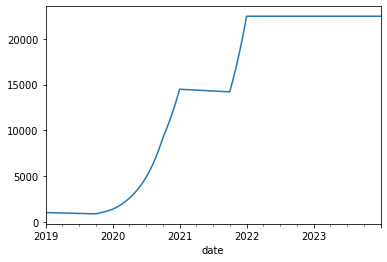

In [61]:
# Plot the price vs. date:
df['price'].plot()

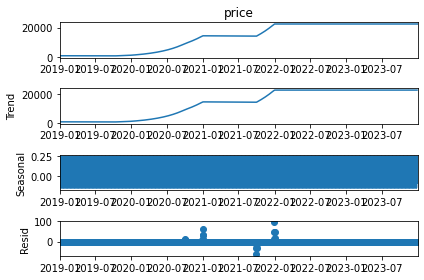

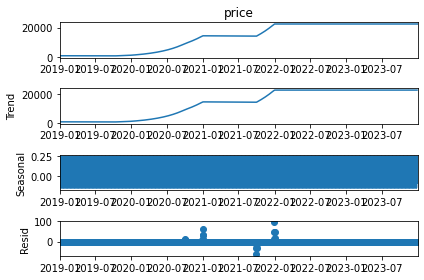

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['price'])
result.plot()

Text(0.5, 1.0, 'Average Price by Year and Month')

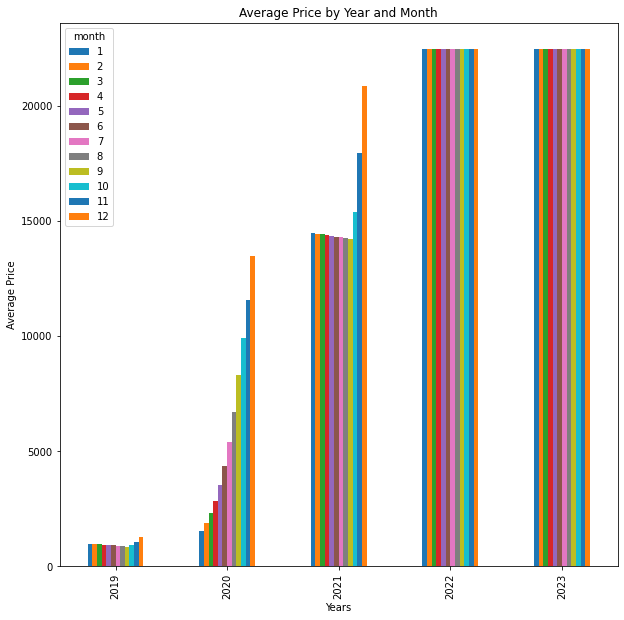

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = df['price'].groupby([df['year'], df['month']]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Year and Month')

it could be seen in the graph that in the early years of the product the average price is lower than it is in the present.

Text(0.5, 1.0, 'Average Likes by Year and Month')

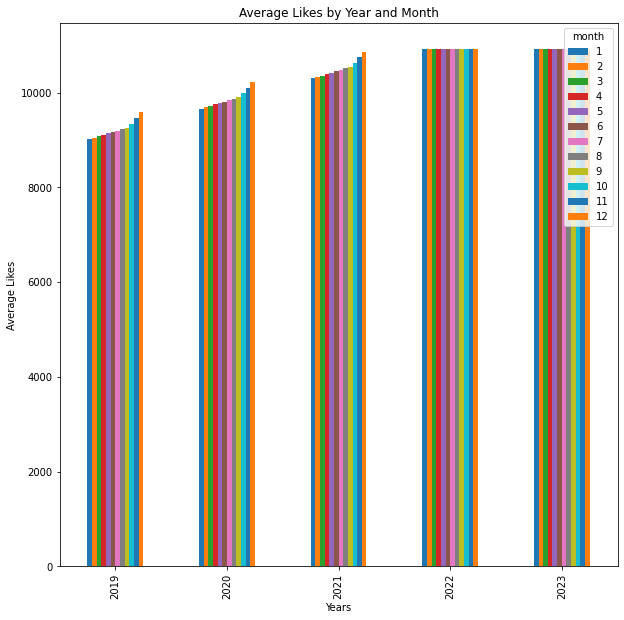

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = df['likes'].groupby([df['year'], df['month']]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average Likes')
ax.set_title('Average Likes by Year and Month')

Text(0.5, 1.0, 'Average Likes by Year and Month')

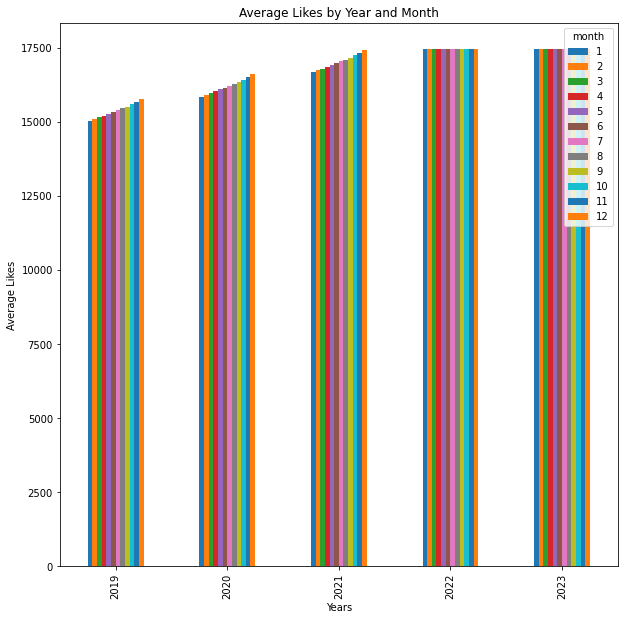

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = df['followers'].groupby([df['year'], df['month']]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average Likes')
ax.set_title('Average Likes by Year and Month')

Text(0.5, 1.0, 'Average dislikes by Year and Month')

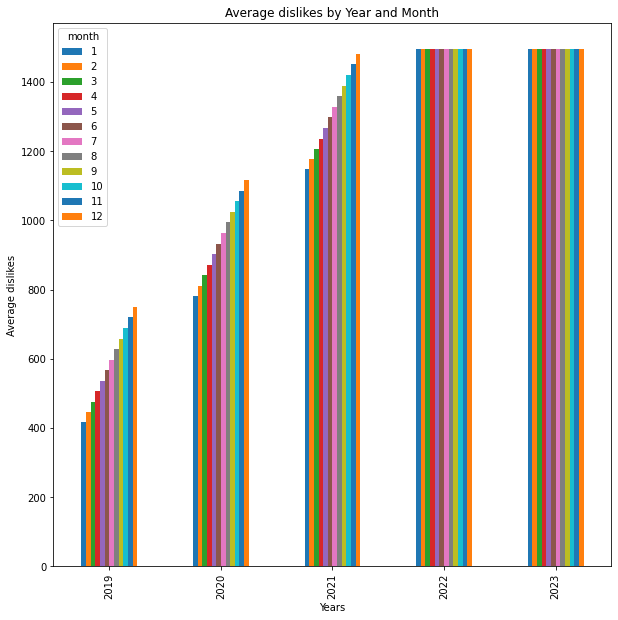

In [84]:
fig, ax = plt.subplots(figsize=(10,10))
bar_plot = df['dislikes'].groupby([df['year'], df['month']]).mean().unstack()
bar_plot.plot(ax = ax, kind='bar')
ax.set_xlabel('Years')
ax.set_ylabel('Average dislikes')
ax.set_title('Average dislikes by Year and Month')

The average amount of dislikes from 2019 has been increasing constantly until 2022 where the average dislike of the product has been constant.

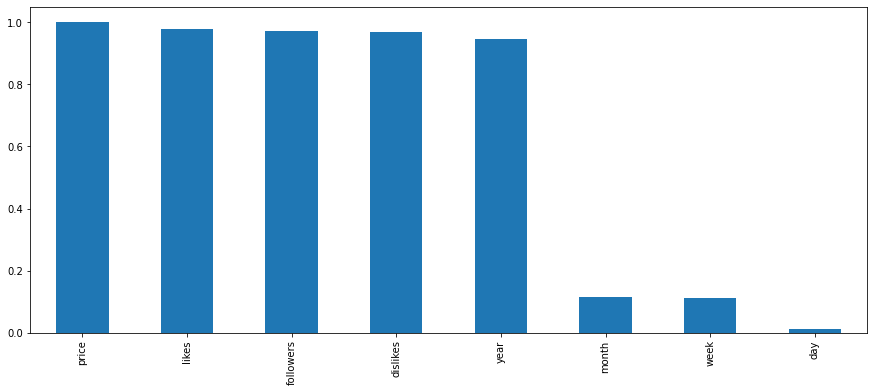

In [66]:
plt.figure(figsize=(15,6))
bars = df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

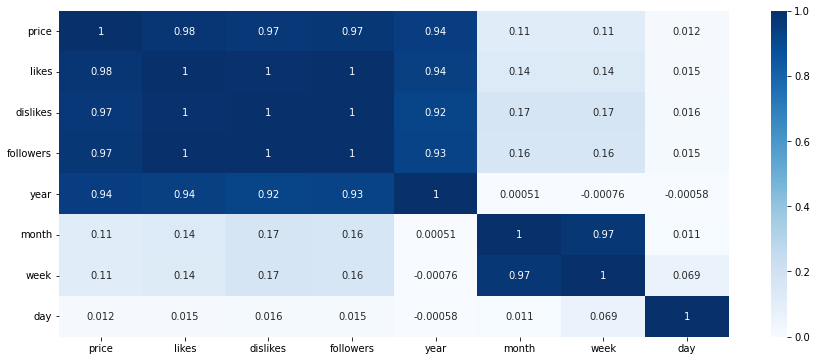

In [67]:
# Create a heatmap

plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

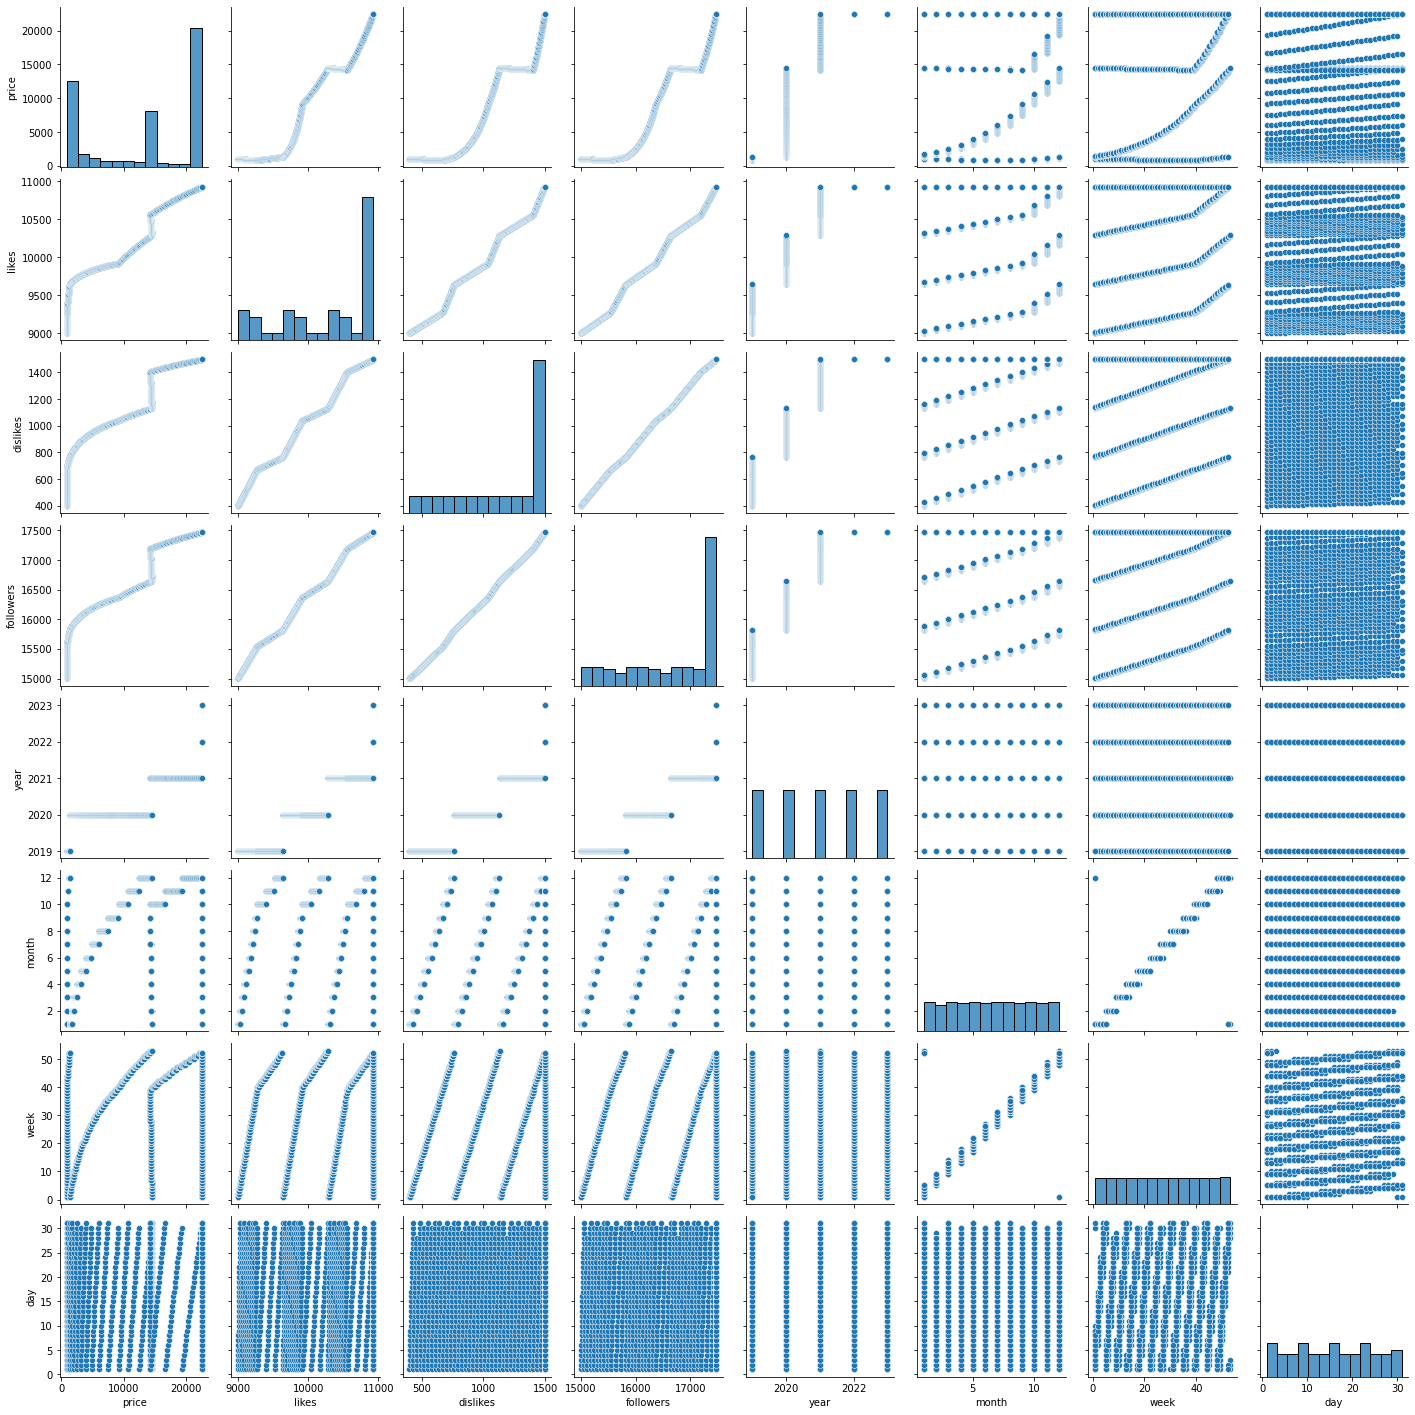

In [68]:
sns.pairplot(df)

# Modelling

In [72]:
# Create traning and testing datasets

x = df[['year','month','week','day','likes', 'dislikes', 'followers']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [73]:
# Identify the best model

regressors = {
    "XGBRegressor": XGBRegressor(silent=True),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(normalize=False),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(normalize=False),
}


In [74]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model, 
                             x_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* TheilSenRegressor
* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


In [75]:
# Order model results

df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
1,RandomForestRegressor,0.06,18
2,DecisionTreeRegressor,0.0,32
0,XGBRegressor,0.01,46
7,Lars,0.0,1636
6,Ridge,0.0,1643
12,BayesianRidge,0.0,1643
11,ARDRegression,0.0,1644
13,ElasticNet,0.0,1669
8,TheilSenRegressor,0.13,1772
9,HuberRegressor,0.01,1885


# Evaluate the Best Model

In [76]:
# Evaluate the best model

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [77]:
# deselect the index column
# df.reset_index(drop=True, inplace=True)

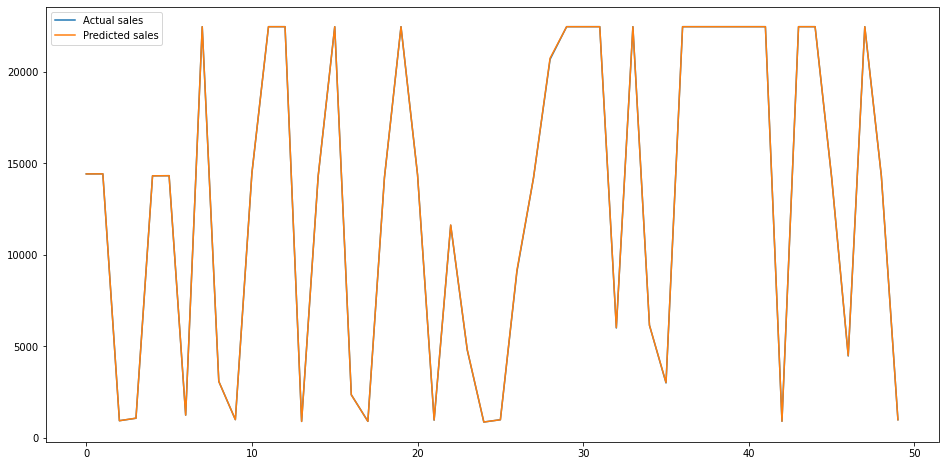

In [78]:
# Plot

test = pd.DataFrame({'Predicted price':y_pred, 'Actual price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['date'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sales','Predicted sales'])

# Predict the price

In [79]:
# Predict a new price amount


temp_data = {   'year' : [2024],
                'month' : [1],
                'week' : [1],
                'day' : [1],
                'likes': [10964],
                'dislikes':[1496],
                'followers':[17648]
        }

df_price_input = pd.DataFrame(temp_data, columns = ['year','month','week','day','likes', 'dislikes', 'followers'])

df_price_prediction_result = model.predict(df_price_input)

df_price_prediction_result

array([22477.74])